# Linear Regression 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
sns.set()
sns.set_color_codes('bright')
pd.set_option('display.max_columns', None, 'display.max_rows', 40)
%matplotlib inline

 ## Reading the dataset

In [2]:
df = pd.read_csv('D:/imarticus/linear reg project/Dataset/HousePrices.csv')
data = df.copy()

## Understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [4]:
data.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(2073, 81)

#### Creating a excel file for correlation matrix

In [6]:
#data.describe().to_excel('desc.xlsx',index=True)

In [7]:
#Viewing the columns of the data

data.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [8]:
# Creating 2 datasets as categorical and numerical
data_columns = list(data.columns)
l = list(data.describe().T.index)
cat = data.loc[:, [i for i in data_columns if i not in l]]
num = data.loc[:, [i for i in l]]
num['Property_Sale_Price'] = data['Property_Sale_Price']

In [9]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2073.0,916.132176,493.014670,1.0,519.0,932.0,1302.0,1820.0
Dwell_Type,2073.0,60.556199,159.924810,20.0,20.0,50.0,70.0,7080.0
LotFrontage,1753.0,72.056475,27.987475,21.0,60.0,70.0,83.0,313.0
LotArea,2073.0,10717.853353,9215.982306,1300.0,7620.0,9492.0,11601.0,215245.0
OverallQual,2073.0,6.233478,1.517115,1.0,5.0,6.0,7.0,10.0
OverallCond,2073.0,5.835022,1.360214,1.0,5.0,5.0,7.0,9.0
YearBuilt,2073.0,1969.445731,30.222647,1872.0,1950.0,1971.0,1999.0,2010.0
YearRemodAdd,2073.0,1986.617463,20.432694,1950.0,1970.0,1995.0,2004.0,2023.0
MasVnrArea,2059.0,101.875668,179.169217,0.0,0.0,0.0,161.5,1600.0
BsmtFinSF1,2073.0,437.949349,448.051119,0.0,0.0,381.0,708.0,5644.0


In [10]:
cat.describe().T

,count,unique,top,freq
Zone_Class,2073,5,RL,1611
Road_Type,2073,2,Pave,2063
Alley,129,2,Grvl,72
Property_Shape,2073,4,Reg,1300
LandContour,2073,4,Lvl,1854
...,...,...,...,...
PoolQC,8,3,Gd,4
Fence,404,4,MnPrv,233
MiscFeature,80,4,Shed,74
SaleType,2073,9,WD,1797


In [11]:
#Checking the null values

data.isna().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

Creating a correlation matrix

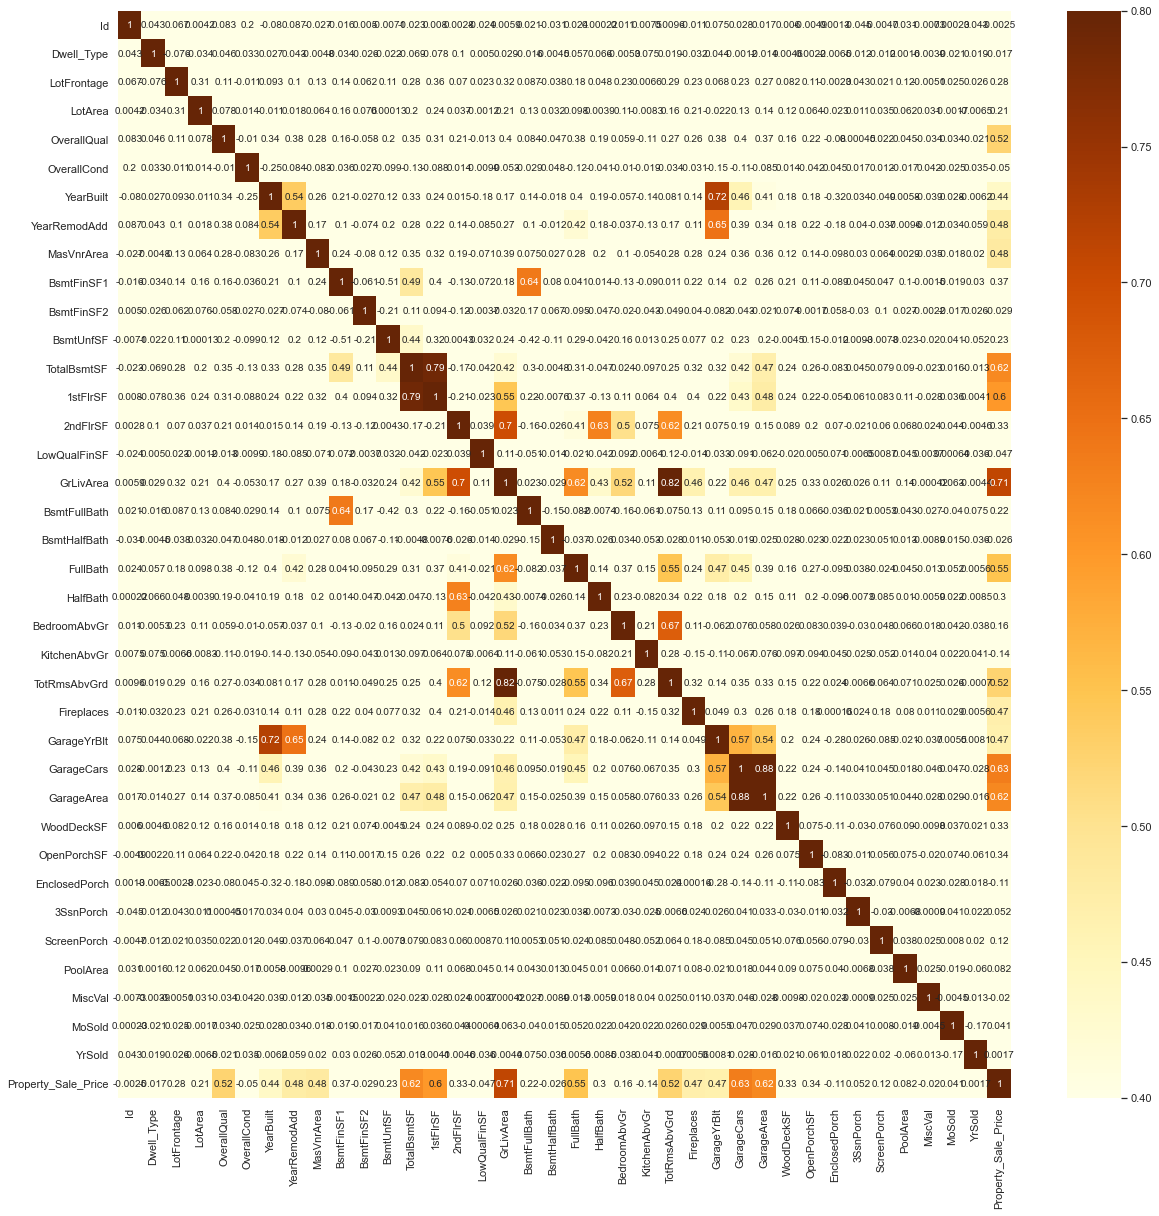

In [12]:
data_corr = data.corr()
#data_corr.to_csv('data_corr.csv',index='True',)

# displaying heatmap
%matplotlib inline
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(data_corr,
                       cmap="YlOrBr",
                       annot=True,
                       vmax=0.8,
                       vmin=0.4)

plt.show()

### Plotting histogram for numerical features

AttributeError: 'Rectangle' object has no property 'legend'

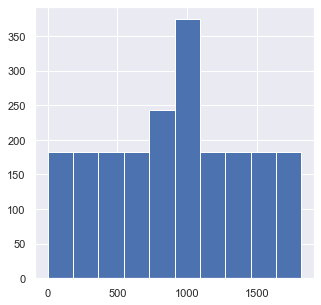

In [13]:
for values in num.columns:
    num[values].hist(legend=True, figsize=(5, 5))
    plt.show()

### Scatter plots

In [ ]:
for values in num.columns:
    plt.figure(figsize=(10, 10))
    sns.scatterplot(num[values], num['Property_Sale_Price'])
    plt.show()

### Treating outliers

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=data['LotFrontage'],
    y=data['Property_Sale_Price'],
)

In [14]:
data[data['LotFrontage'] > 300]

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1689,1690,60,FV,313.0,11499,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1955,1994,Gable,CompShg,VinylSd,VinylSd,BrkFace,448.0,Gd,TA,PConc,Gd,TA,No,GLQ,1000,Unf,0,223,1223,GasA,Ex,Y,SBrkr,1223,904,0,2127,1,0,2,1,3,1,Gd,5,Typ,2,TA,Attchd,1994.0,RFn,2,525,TA,TA,Y,171,132,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,271000
1703,1704,50,RL,313.0,11499,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,6,2005,2017,Gable,CompShg,VinylSd,VinylSd,BrkFace,165.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1393,1393,GasA,Ex,Y,SBrkr,1422,1177,0,2599,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,2005.0,Fin,3,779,TA,TA,Y,668,30,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,333168
1889,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,6,8,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
2036,910,60,RL,313.0,12589,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,4,6,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,742,742,GasA,Ex,Y,SBrkr,742,742,0,1484,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,2,390,TA,TA,Y,36,24,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,174000
2051,925,20,RL,313.0,10240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,8,9,1980,1980,Gable,CompShg,Plywood,Plywood,BrkFace,157.0,TA,Gd,CBlock,Gd,TA,No,BLQ,625,LwQ,1061,0,1686,GasA,TA,Y,SBrkr,1686,0,0,1686,1,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1980.0,Unf,2,612,TA,TA,Y,384,131,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,207500
2061,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,4,5,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,TA,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000


In [15]:
data.drop(data[data['LotFrontage'] > 300].index, inplace=True)

In [16]:
data.shape

(2064, 81)

<AxesSubplot:xlabel='LotArea', ylabel='Property_Sale_Price'>

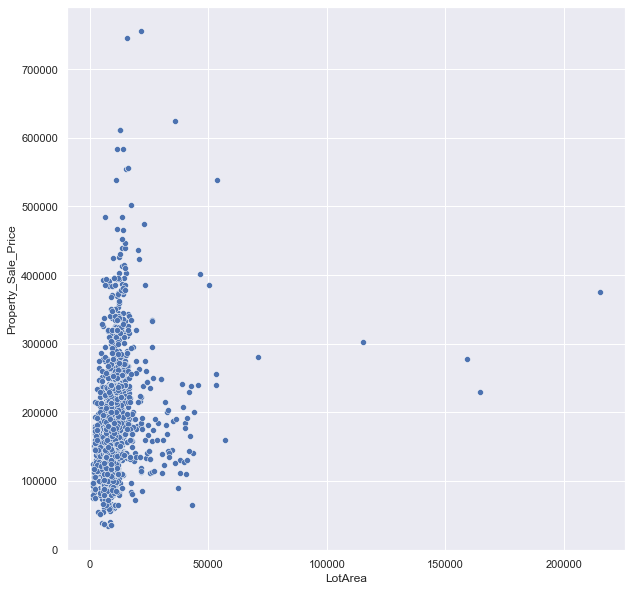

In [17]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=data['LotArea'],
    y=data['Property_Sale_Price'],
)

<AxesSubplot:xlabel='LotArea'>

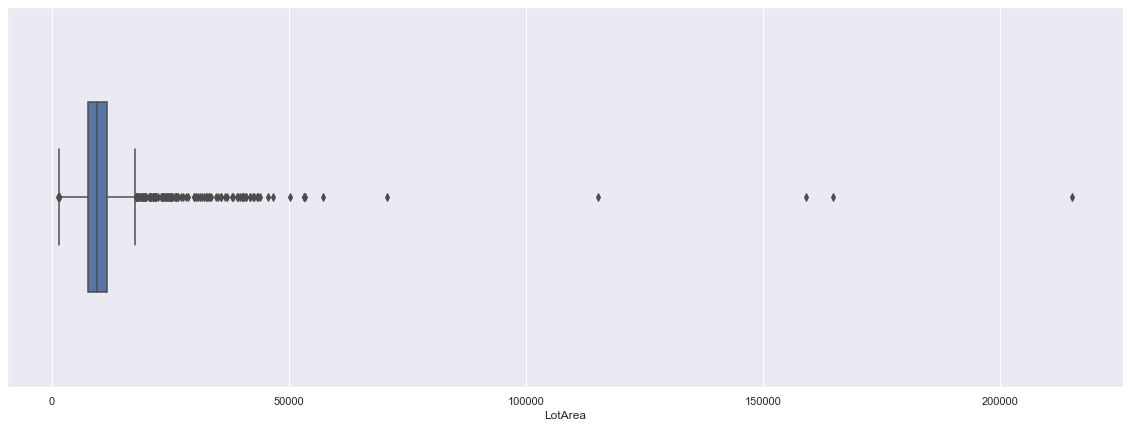

In [18]:
plt.figure(figsize=(20, 7))
sns.boxplot(data['LotArea'], width=0.5)

In [19]:
data[data.LotArea >= 100000]

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [20]:
data.drop(data[data.LotArea >= 100000].index, inplace=True)

### Working with years

In [21]:
data.YearBuilt.isna().sum()

0

In [22]:
data.YrSold.isna().sum()

0

In [23]:
data.YearRemodAdd.isna().sum()

0

In [24]:
data['Year_built'] = data['YrSold'] - data['YearBuilt']
data['Year_RemodArr'] = data['YrSold'] - data['YearRemodAdd']
data['Garage_yr_built'] = data['YrSold'] - data['GarageYrBlt']

In [25]:
data.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],
          axis=1,
          inplace=True)

In [26]:
data.Year_built.describe()

count    2060.000000
mean       38.440777
std        30.317102
min        -3.000000
25%         9.000000
50%        36.000000
75%        58.000000
max       136.000000
Name: Year_built, dtype: float64

In [27]:
data.Year_RemodArr.describe()

count    2060.000000
mean       21.298544
std        20.406879
min       -16.000000
25%         4.000000
50%        13.000000
75%        39.000000
max        60.000000
Name: Year_RemodArr, dtype: float64

In [28]:
data.Garage_yr_built.describe()

count    1947.000000
mean       27.431947
std        24.204228
min       -11.000000
25%         5.000000
50%        24.000000
75%        45.000000
max       102.000000
Name: Garage_yr_built, dtype: float64

In [29]:
data.drop(data[(data['Year_built'] <= -1) | (data['Year_RemodArr'] <= -1) |
               (data['Garage_yr_built'] <= -1)].index,
          inplace=True)
data.shape

(2002, 81)

In [30]:
data.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,Year_built,Year_RemodArr,Garage_yr_built
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5,5.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31,31.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,6,7.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8,8.0


## Treating Null values

In [31]:
na_list = data.isna().sum().nlargest(20).index

### Dropping the columns which has more null values

In [32]:
final = data.drop(columns=na_list[:5])
final = final.dropna(axis=0)

AttributeError: 'Rectangle' object has no property 'legend'

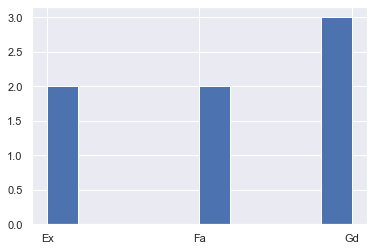

In [33]:
for val in na_list:
    data[val].hist(legend=True)
    plt.show()

In [ ]:
for values in cat.columns:
    plt.figure(figsize=(22, 7))
    sns.boxplot(x=data[values],
                y=data['Property_Sale_Price'],
                palette='bright')
    plt.show()

In [34]:
final_cat_col = [i for i in cat.columns if i in final.columns]

In [ ]:
for val in final_cat_col:
    sns.scatterplot(x=data[val], y=data['Property_Sale_Price'], legend=True)
    plt.show()

In [35]:
final.Utilities.value_counts()

AllPub    1528
NoSeWa       1
Name: Utilities, dtype: int64

In [36]:
final.Road_Type.value_counts()

Pave    1524
Grvl       5
Name: Road_Type, dtype: int64

In [37]:
final.RoofMatl.value_counts()

CompShg    1510
WdShngl       9
Tar&Grv       6
WdShake       2
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [38]:
#not sure if dropping these columns is correct (doubt)
final.drop(columns=['Utilities', 'Road_Type', 'Id'], inplace=True)

In [39]:
final_cat_col = [i for i in cat.columns if i in final.columns]

In [40]:
sas = pd.DataFrame(data['Property_Sale_Price'])
data.drop(columns='Property_Sale_Price', inplace=True)
data['Property_Sale_Price'] = sas['Property_Sale_Price']

In [41]:
#### Load the Data File & Check the Data
#data = pd.read_csv('D:/imarticus/linear reg project/Dataset/HousePrices.csv')
sp = final[['Condition1', 'Condition2']]
sp.info()

print(sp.head())

sp = data[['Condition1', 'Condition2']]
sp.info()
print(sp.Condition1.unique())
print(sp.Condition2.unique())

#### First lets create a list of adata_columns unique values combined together from both the columns
listA = sp.Condition1.unique()
listB = sp.Condition2.unique()
#### set function widata_columns create a set from a list helping us apply different types of set operators on the list
#### Here we've used the OR Operator
Fudata_columns_List = list(set(listA) | set(listB))
print(Fudata_columns_List)

#### Add the sp columns to the spframe and set them to default 0
sp[Fudata_columns_List] = 0
sp.head(10)

#### Lets enumerate through the list and set values using boolean indexing
for i, v in enumerate(Fudata_columns_List):
    #print(v)
    sp.loc[sp['Condition1'] == v, v] = 1
    sp.loc[sp['Condition2'] == v, v] = 1
#print(sp.head(10))
sp = sp.drop(['Condition1', 'Condition2'], 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1529 entries, 0 to 2072
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Condition1  1529 non-null   object
 1   Condition2  1529 non-null   object
dtypes: object(2)
memory usage: 35.8+ KB
  Condition1 Condition2
0       Norm       Norm
1      Feedr       Norm
2       Norm       Norm
3       Norm       Norm
4       Norm       Norm
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2072
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Condition1  2002 non-null   object
 1   Condition2  2002 non-null   object
dtypes: object(2)
memory usage: 46.9+ KB
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
['Feedr', 'RRNe', 'Norm', 'RRAn', 'RRNn', 'PosN', 'PosA', 'Artery', 'RRAe']


KeyError: "None of [Index(['Feedr', 'RRNe', 'Norm', 'RRAn', 'RRNn', 'PosN', 'PosA', 'Artery',\n       'RRAe'],\n      dtype='object')] are in the [columns]"

In [42]:
final = final.drop(['Condition1', 'Condition2'], 1)

In [43]:
final.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Property_Shape,LandContour,LotConfig,LandSlope,Neighborhood,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,Year_built,Year_RemodArr,Garage_yr_built
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8,8,8.0


In [44]:
final_cat_col = [i for i in cat.columns if i in final.columns]

In [45]:
final_df = final.copy()

In [46]:
final_df = pd.get_dummies(final, columns=final_cat_col, drop_first=True)

In [47]:
final_df[list(sp.columns)] = sp[list(sp.columns)]

In [48]:
final_df.head()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price,Year_built,Year_RemodArr,Garage_yr_built,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition1,Condition2
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,5,5,5.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,Norm,Norm
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,31,31,31.0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Splitting train and test data

In [49]:
y = pd.DataFrame(final_df['Property_Sale_Price'])
x = final_df.drop(columns='Property_Sale_Price')

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(x_train)
sc_train_array = sc.transform(x_train)
sc_train = pd.DataFrame(data=sc_train_array, columns=x_train.columns)
sc_test_array = sc.transform(x_test)
sc_test = pd.DataFrame(data=sc_test_array, columns=x_test.columns)
lrs = LinearRegression().fit(sc_train, y_train)
lrs.score(sc_test, y_test)

In [ ]:
sc_train.head()

In [51]:
from lazypredict.Supervised import LazyRegressor

In [52]:
reg= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=reg.fit(x_train,x_test,y_train,y_test)
test

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:26<00:00,  2.06s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.70,0.90,21190.73,0.37
ExtraTreesRegressor,0.68,0.90,21883.07,6.21
GradientBoostingRegressor,0.63,0.88,23586.96,2.50
HuberRegressor,0.63,0.88,23588.16,0.81
XGBRegressor,0.62,0.88,23666.46,1.89
...,...,...,...,...
SGDRegressor,-54332.49,-17278.83,9000864.96,0.11
TransformedTargetRegressor,-1288491685169502093312.00,-409782601512923627520.00,1386089400194377.75,0.44
LinearRegression,-1288491685169502093312.00,-409782601512923627520.00,1386089400194377.75,0.59


In [53]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.70,0.90,21190.73,0.37
ExtraTreesRegressor,0.68,0.90,21883.07,6.21
GradientBoostingRegressor,0.63,0.88,23586.96,2.50
HuberRegressor,0.63,0.88,23588.16,0.81
XGBRegressor,0.62,0.88,23666.46,1.89
LassoCV,0.62,0.88,23737.04,1.95
LassoLarsCV,0.62,0.88,23749.35,1.78
GammaRegressor,0.62,0.88,23908.26,0.15
LassoLars,0.61,0.88,24126.84,0.42


### Building and fitting a model

In [55]:
lr = LinearRegression()
lrs = LinearRegression().fit(sc_train, y_train)

NameError: name 'sc_train' is not defined

In [56]:
lr.fit(x_train, y_train)
lrs.score(sc_test, y_test)

ValueError: could not convert string to float: 'Norm'

In [ ]:
ypred = lr.predict(x_test)
#lr.predict(x_test)

In [58]:
lr.fit(x_train, y_train)

lr.score(x_test, y_test)

ValueError: could not convert string to float: 'Norm'

In [64]:
x_train.describe(include=['O'])

,Condition1,Condition2
count,1223,1223
unique,9,6
top,Norm,Norm
freq,1066,1215


### Checking the accuracies

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=kfolds)
print(accuracies.mean())
print(accuracies.std())

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1 / 2)))

### Plotting the predicted and actual data

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("House prices test and predicted data")
plt.legend()
plt.show()

### Using Ridge and Lasso Regression 

In [ ]:
Lasso = LassoCV()
Ridge = RidgeCV()

Lasso.fit(x_train, y_train)
Ridge.fit(x_train, y_train)

print(Lasso.score(x_test, y_test), Ridge.score(x_test, y_test))